In [24]:
import subprocess
from pathlib import Path

def convert_dicom_to_nifti(input_dir: str, output_dir: str) -> None:
    """
    Convert DICOM files to NIfTI format using dcm2niix with custom options.

    Args:
        input_dir: Path to the directory containing DICOM files.
        output_dir: Path to the directory where NIfTI files will be saved.
    """
    # Ensure the output directory exists
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Construct the dcm2niix command
    command = [
        "dcm2niix",  # Ensure dcm2niix is in your PATH
        "-o", output_dir,  # Output directory
        #"-f", "%b",  # Filename format
        "-z", "y",  # Compress output
        "-m", "2",  # Merge slices
        input_dir  # Input DICOM directory
    ]

    # Run the command
    subprocess.run(command, check=True)


In [25]:
convert_dicom_to_nifti("../data/dicom/", "../data/nifti/")

Compression will be faster with 'pigz' installed http://macappstore.org/pigz/
Chris Rorden's dcm2niiX version v1.0.20241211  Clang15.0.0 ARM (64-bit MacOS)
Advanced feature: '-m 2' ignores Series Instance UID.
Found 277 DICOM file(s)
::autoBids:GE usedSeqName:'' seqName:'' internalSeqName:'' seriesDesc:'' scanSeq:'GR' stepDesc:'' bidsData:'' bidsSuffix:'_acq-_run-11'
Convert 276 DICOM as ../data/nifti/dicom_0_11a (256x256x276x1)
Conversion required 1.838324 seconds (1.635713 for core code).


Image shape: (256, 256, 276)
Central indices: x=128, y=128, z=138


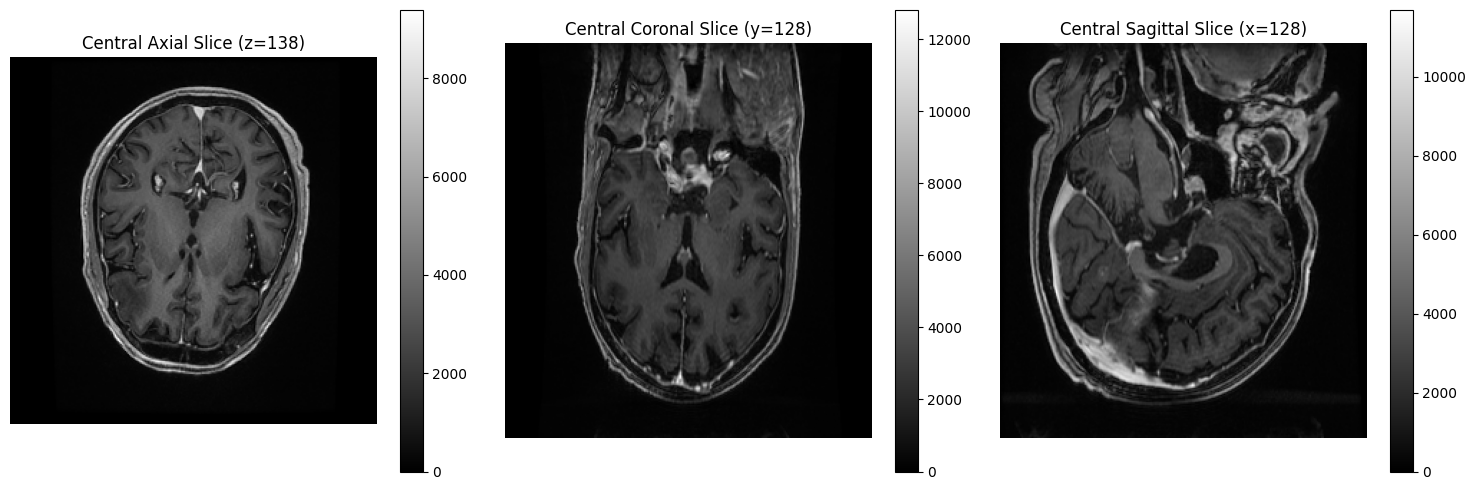

In [26]:
import matplotlib.pyplot as plt
import nibabel as nib 
from pathlib import Path

file_path = Path("../data/nifti/dicom_0_11.nii.gz")
epi_img = nib.load(file_path)
epi_img_data = epi_img.get_fdata()

# Plot centeral slices 
# Get the shape of your image data
shape = epi_img_data.shape
print(f"Image shape: {shape}")

# Calculate the central indices for each dimension
central_x = shape[0] // 2
central_y = shape[1] // 2
central_z = shape[2] // 2

print(f"Central indices: x={central_x}, y={central_y}, z={central_z}")

# Display the central slices in all three orientations
plt.figure(figsize=(15, 5))

# Central axial slice (z-plane)
plt.subplot(1, 3, 1)
# Transpose: Correct orientation for visualization
plt.imshow(epi_img_data[:, :, central_z].T, cmap='gray')
plt.title(f'Central Axial Slice (z={central_z})')
plt.colorbar()
plt.axis('off')

# Central coronal slice (y-plane)
plt.subplot(1, 3, 2)
plt.imshow(epi_img_data[:, central_y, :].T, cmap='gray')
plt.title(f'Central Coronal Slice (y={central_y})')
plt.colorbar()
plt.axis('off')

# Central sagittal slice (x-plane)
plt.subplot(1, 3, 3)
plt.imshow(epi_img_data[central_x, :, :].T, cmap='gray')
plt.title(f'Central Sagittal Slice (x={central_x})')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()